🎯 Desafio dia 76 — Check-ins em Academia

📂 Dataset: desafio_dia_76_checkins_academia.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Você está analisando os registros de entrada dos alunos em uma academia durante várias semanas. As informações coletadas incluem o dia da semana, o horário do check-in, o tempo de treino e o plano do aluno. Seu objetivo é entender os padrões de uso da academia e prever o tempo médio de treino.

🛠️ Tarefas do desafio:

Tratamento de dados
- Preencha os valores ausentes na coluna tempo_treino_min com a mediana da coluna.

- Preencha os valores ausentes da coluna plano com o valor mais frequente (moda).

📊 Análise geral
- Qual o horário mais popular para treino?

- Qual o tempo médio de treino por tipo de plano?

📈 Visualização de dados
- Crie um boxplot comparando o tempo de treino por horário (Manhã, Tarde, Noite).

🤖 Machine Learning - Regressão
- Crie um modelo de regressão (RandomForestRegressor) para prever o tempo_treino_min com base nas variáveis:

    dia_semana, horario, plano

    Utilize train_test_split, get_dummies e avalie o modelo com mean_absolute_error.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv("desafio_dia_76_checkins_academia.csv")
df.head()

,id_checkin,dia_semana,horario,tempo_treino_min,plano
0,5001,Terça,Noite,55.1,Básico
1,5002,Sexta,Tarde,61.8,Premium
2,5003,Terça,Tarde,102.5,Básico
3,5004,Segunda,Tarde,111.4,Básico
4,5005,Segunda,Manhã,62.2,Plus


In [5]:
#Preencha os valores ausentes na coluna tempo_treino_min com a mediana da coluna.
df["tempo_treino_min"] = df["tempo_treino_min"].fillna(df["tempo_treino_min"].median())
df["tempo_treino_min"].isna().sum()

0

In [6]:
#Preencha os valores ausentes da coluna plano com o valor mais frequente (moda).
df["plano"] = df["plano"].fillna(df["plano"].mode()[0])
df["plano"].isna().sum()

0

In [7]:
#Qual o horário mais popular para treino?
horario_popular = df["horario"].value_counts()
print(horario_popular)

horario
Manhã    217
Tarde    146
Noite    137
Name: count, dtype: int64


In [8]:
#Qual o tempo médio de treino por tipo de plano?
tempo_medio_por_plano = df.groupby("plano")["tempo_treino_min"].mean()
print(tempo_medio_por_plano)

plano
Básico     66.043385
Plus       63.809603
Premium    64.505435
Name: tempo_treino_min, dtype: float64


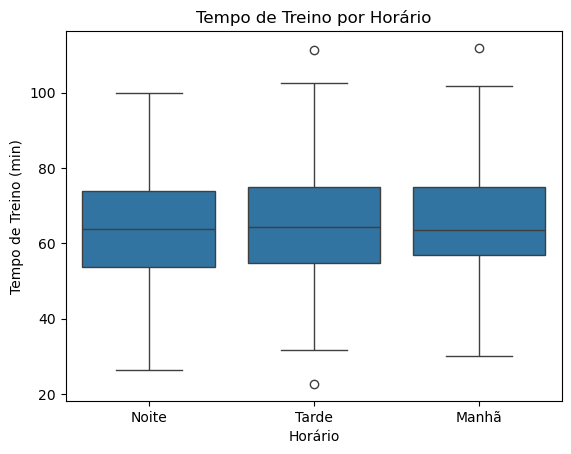

In [12]:
#Crie um boxplot comparando o tempo de treino por horário (Manhã, Tarde, Noite).
sns.boxplot(df, x="horario", y="tempo_treino_min")
plt.title("Tempo de Treino por Horário")
plt.xlabel("Horário")
plt.ylabel("Tempo de Treino (min)")
plt.show()

In [14]:
#Crie um modelo de regressão (RandomForestRegressor) para prever o tempo_treino_min com base nas variáveis:
X = df[["dia_semana", "horario", "plano"]]
y = df["tempo_treino_min"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

12.489210109360904
